## Rozwiązywanie równań nieliniowych 
Funkcje testowe: 
$$f(x) = 2x^2 -2x + 1$$
$$f(x) = -26 + 85x - 91x^2 +44x^3 -8x^4 + x5$$
$$f(x) = 4^x - 3^{2x} + 2^{3x} -1$$
$$f(x) = 3*x + sin(x) - cos^3(x)$$
$$f(x) = 27x^3−3x+1$$

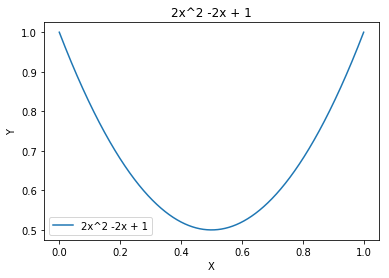

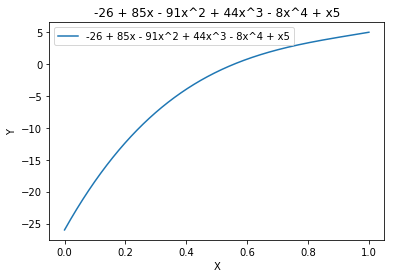

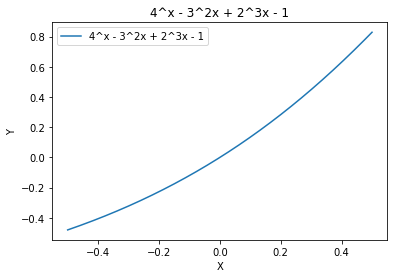

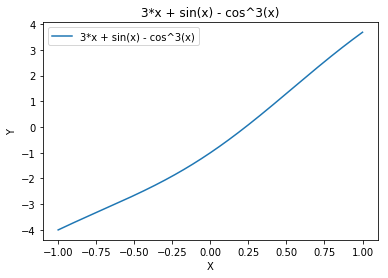

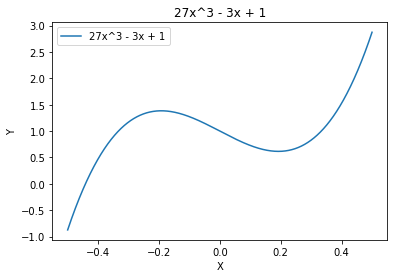

In [163]:
import math
import numpy as np
import scipy.misc as msc
from scipy import optimize
import matplotlib.pyplot as plt

funs = [
    lambda x: 2 * x ** 2 - 2 * x + 1, 
    lambda x: -26 + 85 * x - 91 * x ** 2 + 44 * x ** 3 - 8 * x ** 4 + x ** 5,
    lambda x: 4 ** x - 3 ** (2 * x) + 2 ** (3 * x) - 1,
    lambda x: 3 * x + math.sin(x) - math.cos(x) ** 3,
    lambda x: 27 * x ** 3 - 3 * x + 1
]

fun_names = [
    "2x^2 -2x + 1",
    "-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5",
    "4^x - 3^2x + 2^3x - 1",
    "3*x + sin(x) - cos^3(x)",
    "27x^3 - 3x + 1"
]

def show_graphic(f, f_name, a, b, n):
    domain = np.linspace(a, b, n)
    values = np.vectorize(f)(domain)
    plt.plot(domain, values, label = f_name)
    plt.title(f_name)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
    

show_graphic(funs[0], fun_names[0], 0, 1, 10000)
show_graphic(funs[1], fun_names[1], 0, 1, 10000)
show_graphic(funs[2], fun_names[2], -0.5, 0.5, 10000)
show_graphic(funs[3], fun_names[3], -1, 1, 10000)
show_graphic(funs[4], fun_names[4], -0.5, 0.5, 10000)

### Zadanie 1:
Zaimplementuj metodą bisekcji. Sprawdź jej działanie na powyższych funkcjach testowych. Dobierz samodzielnie przedział dla poszukiwania miejsca zerowego. Sprawdź dokładnośc metody. 
Oceń szybkość zbieżności dla każdej testowanej funkcji. Zwróć uwagę na sposób doboru E.

In [151]:
def bisection(f, a, b, n):
    if f(a) * f(b) >= 0:
        return None, None
    d = b - a
    for i in range(n):
        c = float(a + b) / float(2)
        if f(c) == 0:
            return c, float(d) / float(2 ** i)
        if f(c) * f(a) < 0:
            b = c
        else: 
            a = c
    E = float(d) / float(2 ** n)
    return c, E

def test(f, f_name, a, b, n):
    c, E = bisection(f, a, b, n)
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c, 'error', E)

In [156]:
test(funs[0], fun_names[0], 0, 1, 1000)
test(funs[1], fun_names[1], 0, 1, 1000)
test(funs[2], fun_names[2], -0.5, 0.5, 1000)
test(funs[3], fun_names[3], -1, 1, 1000)
test(funs[4], fun_names[4], -0.5, 0.5, 1000)

('function', '2x^2 -2x + 1', 'interval from', 0, 'to', 1, 'iterations', 1000, 'result', None, 'error', None)
('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', 0, 'to', 1, 'iterations', 1000, 'result', 0.5570255162865259, 'error', 9.332636185032189e-302)
('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 1000, 'result', 0.0, 'error', 1.0)
('function', '3*x + sin(x) - cos^3(x)', 'interval from', -1, 'to', 1, 'iterations', 1000, 'result', 0.2310996034771355, 'error', 5.551115123125783e-17)
('function', '27x^3 - 3x + 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 1000, 'result', -0.4415726524149154, 'error', 9.332636185032189e-302)


### Zadanie 2: 
Zaimplementuj metodą Newtona-Raphsona.  Sprawdź jej działanie na powyższych funkcjach testowych. Punkt startowy i przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [157]:
def newton_raphson(f, a, b, n):
    if f(a) * f(b) >= 0:
        return None
    x = b
    for i in range(n):
        if msc.derivative(f, x) == 0:
            return None
        h = float(f(x)) / float(msc.derivative(f, x))
        x = x - h
    return x

def test2(f, f_name, a, b, n):
    c = newton_raphson(f, a, b, n)
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c)    

In [159]:
test2(funs[0], fun_names[0], 0, 1, 1000)
test2(funs[1], fun_names[1], 0, 1, 1000)
test2(funs[2], fun_names[2], -0.5, 0.5, 1000)
test2(funs[3], fun_names[3], -1, 1, 1000)
test2(funs[4], fun_names[4], -0.5, 0.5, 1000)

('function', '2x^2 -2x + 1', 'interval from', 0, 'to', 1, 'iterations', 1000, 'result', None)
('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', 0, 'to', 1, 'iterations', 1000, 'result', 0.5570255162865262)
('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 1000, 'result', -7.520377873581182e-18)
('function', '3*x + sin(x) - cos^3(x)', 'interval from', -1, 'to', 1, 'iterations', 1000, 'result', 0.2310996034771355)
('function', '27x^3 - 3x + 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 1000, 'result', -0.4415726524149153)


### Zadanie 3: 
Zaimplementuje metodę siecznych (Eulera). Przedział poszukiwań dobierz samodzielnie (jakie warunki?). 

In [160]:
def euler(f, a, b, n):
    if f(a) * f(b) >= 0:
        return None
    for i in range(n):
        c = b - float(f(b) * (b - a)) / float(f(b) - f(a))
        a, b = b, c
    return c

def test3(f, f_name, a, b, n):
    c = euler(f, a, b, n)
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c)

In [161]:
test3(funs[0], fun_names[0], 0, 1, 10)
test3(funs[1], fun_names[1], 0, 1, 10)
test3(funs[2], fun_names[2], -0.5, 0.5, 10)
test3(funs[3], fun_names[3], -1, 1, 8)
test3(funs[4], fun_names[4], -0.5, 0.5, 10)

('function', '2x^2 -2x + 1', 'interval from', 0, 'to', 1, 'iterations', 10, 'result', None)
('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', 0, 'to', 1, 'iterations', 10, 'result', 0.5570255162865259)
('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 10, 'result', -1.509325190033435e-17)
('function', '3*x + sin(x) - cos^3(x)', 'interval from', -1, 'to', 1, 'iterations', 8, 'result', 0.2310996034771355)
('function', '27x^3 - 3x + 1', 'interval from', -0.5, 'to', 0.5, 'iterations', 10, 'result', -0.44157265229982773)


### Zadanie 4: 
Wybierz jedną z metod rozwiązywania równań nieliniowych dostępna w bibliotece numpy lub scipy.  Porównaj dokładność wszystkiech czterech metod.

In [144]:
def compare(f, f_name, a, b, n):
    corr_res = optimize.bisect(f, a, b)
    
    c, E = bisection(f, a, b, n)
    error = float(abs(c - corr_res)) / float(abs(corr_res))
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c, 'correct result', corr_res, 'error', error)

    c = newton_raphson(f, a, b, n)
    error = float(abs(c - corr_res)) / float(abs(corr_res))
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c, 'correct result', corr_res, 'error', error)

    c = euler(f, a, b, n)
    error = float(abs(c - corr_res)) / float(abs(corr_res))
    print('function', f_name, 'interval from', a, 'to', b, 'iterations', n, 'result', c, 'correct result', corr_res, 'error', error)

In [145]:
compare(funs[1], fun_names[1], -2, 2, 10)

('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', -2, 'to', 2, 'iterations', 10, 'result', 0.55859375, 'correct result', 0.5570255162874673, 'error', 0.0028153714088087604)
('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', -2, 'to', 2, 'iterations', 10, 'result', 0.5747919118340159, 'correct result', 0.5570255162874673, 'error', 0.03189511975135403)
('function', '-26 + 85x - 91x^2 + 44x^3 - 8x^4 + x5', 'interval from', -2, 'to', 2, 'iterations', 10, 'result', 0.5570255231663557, 'correct result', 0.5570255162874673, 'error', 1.2349323588755772e-08)


In [147]:
compare(funs[2], fun_names[2], -2, 0.5, 10)

('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -2, 'to', 0.5, 'iterations', 10, 'result', -0.00048828125, 'correct result', -6.821210263296962e-13, 'error', 715827881.6666666)
('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -2, 'to', 0.5, 'iterations', 10, 'result', -1.7236236940256133e-12, 'correct result', -6.821210263296962e-13, 'error', 1.5268590579885124)
('function', '4^x - 3^2x + 2^3x - 1', 'interval from', -2, 'to', 0.5, 'iterations', 10, 'result', -1.1390411783010337e-17, 'correct result', -6.821210263296962e-13, 'error', 0.9999833014797326)


In [148]:
compare(funs[3], fun_names[3], -2, 2, 8)

('function', '3*x + sin(x) - cos^3(x)', 'interval from', -2, 'to', 2, 'iterations', 8, 'result', 0.234375, 'correct result', 0.23109960347755987, 'error', 0.014173094514885997)
('function', '3*x + sin(x) - cos^3(x)', 'interval from', -2, 'to', 2, 'iterations', 8, 'result', 0.23110030850053215, 'correct result', 0.23109960347755987, 'error', 3.0507320725409065e-06)
('function', '3*x + sin(x) - cos^3(x)', 'interval from', -2, 'to', 2, 'iterations', 8, 'result', 0.2310996034771355, 'correct result', 0.23109960347755987, 'error', 1.836242854603409e-12)


In [149]:
compare(funs[4], fun_names[4], -1, 1, 10)

('function', '27x^3 - 3x + 1', 'interval from', -1, 'to', 1, 'iterations', 10, 'result', -0.443359375, 'correct result', -0.441572652414834, 'error', 0.004046270925961825)
('function', '27x^3 - 3x + 1', 'interval from', -1, 'to', 1, 'iterations', 10, 'result', 0.24211019492409222, 'correct result', -0.441572652414834, 'error', 1.5482907367565928)
('function', '27x^3 - 3x + 1', 'interval from', -1, 'to', 1, 'iterations', 10, 'result', 0.05967940354195855, 'correct result', -0.441572652414834, 'error', 1.1351519466062698)
